In [1]:
from datetime import datetime    #زمان
import pandas as pd                    #پانداس
import matplotlib.pyplot as plt         #مصورسازی
import numpy as np          
import finpy_tse as fpy            # دریافت دیتای قیمتی از finpy
import pytse_client as tse
import yfinance as yf
import ta 
import math as math
import asyncio

In [2]:
rsi_period1=14      # دوره محاسباتی اول
rsi_period2=5       #دوره محاسبتی دوم




upper_band=70     # بیش خرید
lower_band=30    # بیش فروش

In [3]:


# دریافت داده قیمتی شاخص کل بورس

def index_kol(bars:int=9500):
    while True:
        try:
            data=fpy.Get_CWI_History(ignore_date=True,double_date=True)
            data=data.iloc[:-bars:-1][::-1]
            data.index=data['Date']
            return(data)
        except Exception as e:
            print(f"An error occurred: {e}")
            asyncio.sleep(2)  # Sleep for 10 seconds before retrying



symbol_data=index_kol()
symbol_data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174
...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,2165990.0,2166380.0,2159160.0,2164692.0,2164692.3,4125186697
2024-05-18,2024-05-18,2166800.0,2174950.0,2166800.0,2168676.0,2168676.3,4410308923
2024-05-19,2024-05-19,2166180.0,2166180.0,2106430.0,2112560.0,2112560.3,5689636315


In [4]:
symbol_data['rsi_1'] = ta.momentum.RSIIndicator(symbol_data['Close'], window=rsi_period1).rsi()
symbol_data['rsi_2'] = ta.momentum.RSIIndicator(symbol_data['Close'], window=rsi_period2).rsi()

In [5]:
symbol_data

,Date,Open,High,Low,Close,Adj Close,Volume,rsi_1,rsi_2
Date,,,,,,,,,
2008-12-06,2008-12-06,9249.0,9249.0,9168.0,9178.0,9178.3,8539624,NaN,NaN
2008-12-07,2008-12-07,9178.0,9178.0,9130.0,9130.0,9130.5,11752353,NaN,NaN
2008-12-08,2008-12-08,9103.0,9103.0,9080.0,9089.0,9089.2,15299115,NaN,NaN
2008-12-10,2008-12-10,9072.0,9072.0,9024.0,9024.0,9023.7,15689653,NaN,NaN
2008-12-13,2008-12-13,8973.0,8973.0,8973.0,8973.0,8973.3,31428174,NaN,0.000000
...,...,...,...,...,...,...,...,...,...
2024-05-15,2024-05-15,2165990.0,2166380.0,2159160.0,2164692.0,2164692.3,4125186697,32.287582,10.709597
2024-05-18,2024-05-18,2166800.0,2174950.0,2166800.0,2168676.0,2168676.3,4410308923,33.877373,18.114323
2024-05-19,2024-05-19,2166180.0,2166180.0,2106430.0,2112560.0,2112560.3,5689636315,24.980687,7.363257


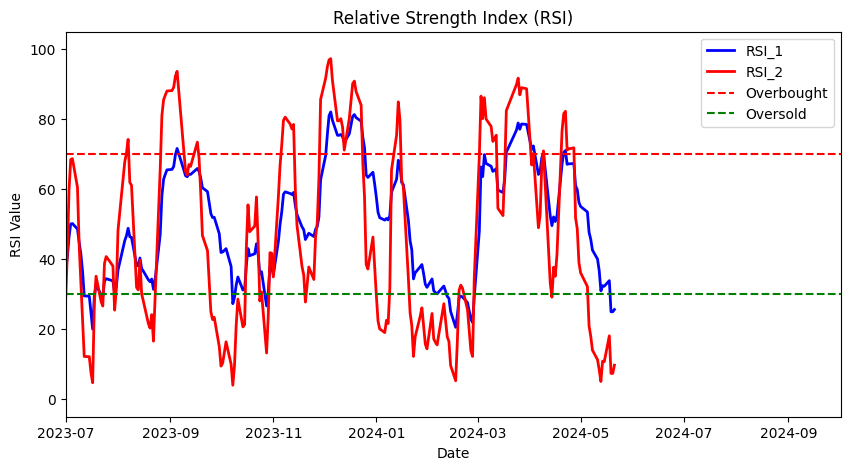

In [9]:
# تولید نمودار RSI
plt.figure(figsize=(10, 5))
plt.xlim([pd.to_datetime('2023-07-01'), pd.to_datetime('2024-10-02')])
plt.plot(symbol_data.index, symbol_data['rsi_1'], label='RSI_1', color='b', linewidth=2)
plt.plot(symbol_data.index, symbol_data['rsi_2'], label='RSI_2', color='r', linewidth=2)

# نشان دادن خطوط مرزی
plt.axhline(y=upper_band, color='r', linestyle='--', label='Overbought')
plt.axhline(y=lower_band, color='g', linestyle='--', label='Oversold')


# افزودن نام محورها و عنوان
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()

# نمایش نمودار
plt.show()